# Alugar, economizar e pagar à vista ou financiar um imóvel? Um estudo de caso.
> Temos aqui um estudo de caso em matemática financeira resolvido em Python. O exercício envolve calcular diferentes cenários com relação a aquisição - ou não - de um imóvel. Além disso, veja como manipular tabelas com o pacote Pandas e a produção de gráficos com Matplotlib.

- toc: true
- badges: true
- comments: true
- author: [Felipe N. Schuch, Mathias S. Tessmann]
- image: images/house.png
- categories: [Matemática Financeira, Pandas, Matplotlib]

## Introdução

A matemática financeira é uma disciplina fundamental na atuação de profissionais de diversos setores e, adicionalment, possui importante papel na gestão de recursos próprios e no gerenciamento do orçamento doméstico.  É justamente nesse ponto que muitas pessoas têm seu primeiro contato com programação, e talvez nem se deem conta disso, ao utilizar alguma aplicação de manipulação de planilhas para controlar os gastos de casa. Verdade seja dita, planilhas são estruturas de dados muito úteis.

Esta postagem trata de um estudo de cenários didáticos sobre a aquisição - ou não - de um imóvel. Ele cobre três  situações:
* Comprar com uma entrada e financiamento;
* Alugar e investir mensalmente;
* Economizar e comprar à vista.

Para tanto, exemplifica-se como resolver o problema proposto com o emprego de duas importantes ferramentas:

* [Pandas](https://pandas.pydata.org/) é um pacote Python que fornece estruturas de dados rápidas, flexíveis e expressivas, projetadas para tornar o trabalho com dados “relacionais” ou “rotulados” fáceis e intuitivos. O objetivo é ser o alicerce fundamental de alto nível para a análise prática de dados do mundo real em Python. Além disso, tem o objetivo mais amplo de se tornar a mais prestigiada e flexível ferramenta de análise / manipulação de dados de código aberto disponível em qualquer linguagem. Pandas é bem adequado para muitos tipos diferentes de dados:
    * Dados tabulares com colunas de tipos heterogêneos, como em uma tabela SQL, arquivo `.csv` ou planilha do Excel;
    * Dados de séries temporais ordenados e não ordenados (não necessariamente de frequência fixa);
    * Dados de matriz arbitrária (homogeneamente digitados ou heterogêneos) com rótulos de linha e coluna;
    * Qualquer outra forma de conjuntos de dados observacionais / estatísticos. Os dados realmente não precisam ser rotulados para serem colocados em uma estrutura de dados de pandas.
* [Matplotlib](https://matplotlib.org/) é uma biblioteca de plotagem 2D do Python, que produz figuras de qualidade de publicação em uma variedade de formatos impressos e ambientes interativos entre plataformas. Matplotlib pode ser usado em scripts Python, nos shells do Python e do IPython, no notebook Jupyter, nos servidores de aplicativos da web e em quatro kits de ferramentas de interface gráfica do usuário. **Matplotlib tenta tornar as coisas fáceis simples e as coisas difíceis possíveis**. Você pode gerar gráficos, histogramas, espectros de potência, gráficos de barras, gráficos de erros, diagramas de dispersão, etc., com apenas algumas linhas de código.

In [0]:
# As primeiras linhas de código tratam
# de importar ambas bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
#hide

# Esse bloco modifica alguns dos valores padrões para
# apresentação das figuras

plt.rcdefaults()

# https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html
plt.style.use('ggplot')

# https://matplotlib.org/3.1.1/tutorials/introductory/customizing.html
plt.rcParams.update({'figure.dpi' : 100,
                     "figure.figsize" : (6, 6),
                     "axes.formatter.limits" : (-8, 8)
                    })

In [0]:
#hide

# Esse bloco desliga algumas mensagens de aviso que estava recebendo do Pandas,
# deve-se ter cautela ao fazer esse tipo de coisa, mas as mensagens estavam
# atrapalhando a apresentação visual desse post

#https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
pd.options.mode.chained_assignment = None  # default='warn'

Se reproduzir esse conteúdo em partes ou em sua totalidade, forneça um link para o material original:
* https://fschuch.github.io/aprenda.py/blog/matematica-financeira-imovel.html

E por favor, apoie os nossos autores [@fschuch](https://twitter.com/fschuch) e [@mathiazst](https://twitter.com/mathiazst).

In [0]:
#hide

'''
Se reproduzir esse conteúdo em partes ou em
sua totalidade, forneça um link para o
material original:
https://fschuch.github.io/aprenda.py/blog/matematica-financeira-imovel.html

E por favor, apoie os nossos autores:
https://twitter.com/fschuch
https://twitter.com/mathiazst
'''
def copyright():
    plt.annotate('© 2020 Aprenda.py, por F. N. Schuch & M. S. Tessmann',
                 xy=(0.5,0.01),
                 xycoords='axes fraction',
                 ha='center', va='bottom');

> Important: Essa não é uma recomendação de comprar. Lucros passados não são garantia de lucros futuros. Esse é um estudo de cenários didáticos e hipotéticos. Os autores se eximem completamente de qualquer responsabilidade sobre o uso, interpretação e consequências do uso direto ou indireto de qualquer informação contida nesse material.

## Sistemas de Amortização

Quando falamos em sistemas de pagamento, ou sistema de amortização, existem quatro parâmetros fundamentais:
* Tempo total \\(N\\);
* Taxa de juros \\(i\\);
* Saldo devedor inicial \\(SD_0\\);
* Valor da parcela, que por sua vez é subdividido em:
    * Amortização, valor que efetivamente abate parte do saldo devedor;
    * Juros, valor pago como remuneração ao financiador,
    
    onde observa-se que:
\\[ \text{Amortização} = \text{Parcela} - \text{Juros}. \\]

Pode-se citar pelo menos dois modelos clássicos que tratam dessa relação:

* **Sistema de Amortização Constante (SAC)**: Como o próprio nome sugere, a amortização é constante ao longo de todo o tempo:
\\[
\text{Amortização}_n = \dfrac{SD_0}{N}
\\]
Os juros são obtidos ao multiplicar a taxa de juros pelo saldo devedor do período anterior:
\\[
\text{Juros}_n = i \times SD_{n-1}
\\]
E como vimos, a parcela é a soma dos dois anteriores:
\\[
\text{Parcela}_n = \text{Juros}_n + \text{Amortização}_n.
\\]
Note que nesse sistema o saldo devedor decresce linearmente, além disso, as prestações diminuem gradualmente com o passar do tempo.

* Outra opção é a **Tabela Price**, ou sistema francês de amortização. Aqui, o valor das parcelas é constante no tempo, e obtido por meio de equação:
\\[
\text{Parcela} = SD_0 \dfrac{i}{1-(1+i)^{-n}}.
\\]
Os juros são novamente obtidos por:
\\[
\text{Juros}_n = i \times SD_{n-1}.
\\]
E por fim obtemos o valor da amortização de cada parcela como:
\\[
\text{Amortização}_n = \text{Parcela}_n - \text{Juros}_n.
\\]

Tendo tudo isso em vista, podemos construir uma rotina em Python que nos retorne um `DataFrame` em Pandas, que nada mais é do que uma tabela. Ele inclui os valores obtidos para juros, amortização, parcela e saldo devedor para cada período `n`, em função da escolha do sistema de pagamento (SAC ou Price), da taxa de juros `i`, do número de períodos de tempo `N` e do saldo devedor inicial `SD0`. Segue a função:

In [0]:
#collapse-hide
def sistema_pagamento(sis,i,N,SD0):
    '''
    Calcula os juros, amortização, valor das
    parcelas e saldo devedor em função do
    sistema de amortização escolhido
    
    Args:
        sis (str): Sistema de amortização 
                   (SAC ou Price)
        i (float): Taxa de juros
        N (int): Períodos de tempo
        SD0 (float): Saldo devedor inicial
        
    Returns:
        df: DataFrame com as colunas juros,
            amortização, valor das parcelas
            e saldo devedor
    '''
    df = pd.DataFrame(columns=['Juros',
                               'Amortização',
                               'Parcela',
                               'Saldo Devedor'],
                      index=range(N+1)
                     )
    
    df['Saldo Devedor'][0] = SD0

    if sis.lower() == 'sac':
    
        df['Amortização'][1:] = SD0/N

        for n in df.index[1:]:
            df['Juros'][n] = round(df['Saldo Devedor'][n-1]*i,2)
            df['Parcela'][n] = df['Juros'][n]+df['Amortização'][n]
            df['Saldo Devedor'][n] = df['Saldo Devedor'][n-1] - df['Amortização'][n]
    
    elif sis.lower() == 'price':
        
        df['Parcela'][1:] = round(SD0*(i)/(1-(1+i)**(-N)),2)

        for n in df.index[1:]:
            df['Juros'][n] = round(df['Saldo Devedor'][n-1]*i,2)
            df['Amortização'][n] = df['Parcela'][n] - df['Juros'][n]
            df['Saldo Devedor'][n] = df['Saldo Devedor'][n-1] - df['Amortização'][n]
    
    else:
        print('Valor inválido para sis, tente novamente com sac ou price')
    
    # Aqui ajustamos a última parcela caso tenha valor residual devido ao arredondamento
    df['Parcela'][N] += df['Saldo Devedor'][N]
    df['Saldo Devedor'][N] -= df['Saldo Devedor'][N]
    
    return df

Agora podemos ver um exemplo da função em ação para ambos os sistemas de pagamento, para um taxa de juros de 5%, 4 períodos de tempo e saldo devedor inicial de R$1.000:

In [0]:
sistema_pagamento('sac',0.05,4,1000)

,Juros,Amortização,Parcela,Saldo Devedor
0,NaN,NaN,NaN,1000
1,50,250,300,750
2,37.5,250,287.5,500
3,25,250,275,250
4,12.5,250,262.5,0


Note na tabela acima algumas posições marcadas com `NaN`, abreviação para não um número (do inglês para *Not a Number*). Eles ocorreram no nosso exemplo para o tempo 0, onde valores não foram informados para algumas colunas. O `NaN` não é necessariamente um problema, a biblioteca Pandas é justamente capaz de lidar com dados faltantes (mais detalhes [aqui](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html)). Perceba que essas células podem ser definidos para qualquer valor desejado com o método `fillna()`, vamos utiliza-lo no segundo exemplo:

In [0]:
sistema_pagamento('price',0.05,4,1000).fillna(0)

,Juros,Amortização,Parcela,Saldo Devedor
0,0.00,0.00,0.00,1000.00
1,50.00,232.01,282.01,767.99
2,38.40,243.61,282.01,524.38
3,26.22,255.79,282.01,268.59
4,13.43,268.58,282.02,0.00


Uma das vantagens de se trabalhar com dados tabulares é que eles podem ser facilmente transformados em gráfico, veja como fazemos isso com apenas algumas linhas de código:

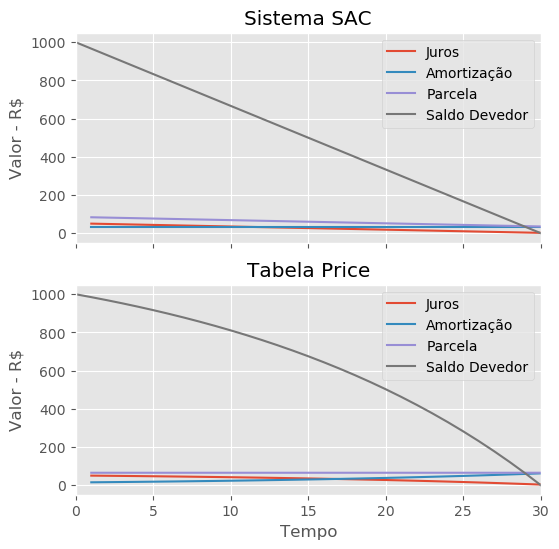

In [0]:
fig, (ax1, ax2) = plt.subplots(nrows=2,
                               ncols=1,
                               sharex=True,
                               sharey=True)

sistema_pagamento('sac',0.05,30,1000).plot(ax=ax1,title='Sistema SAC')
sistema_pagamento('price',0.05,30,1000).plot(ax=ax2,title='Tabela Price')

ax2.set_xlabel('Tempo')
ax1.set_ylabel('Valor - R$')
ax2.set_ylabel('Valor - R$');

Note na figura acima todos os comentários que fizemos anteriormente sobre ambas as formas de pagamento.

## Cenários

Aqui estabelecemos os parâmetros de cálculo que serão empregados nos diferentes cenários. São eles:
* Valor do imóvel `valor_do_imovel`;
* Valor da entrada `entrada`;
* Taxa de juros anual para o financiamento `taxa_financeamento_anual`;
* Taxa anual de aluguel `taxa_aluguel_anual`: Fração do preço total do imóvel que seria paga como aluguel em um ano;
* Rendimento anual esperado caso os aportes sejam investidos `rendimento_investimentos_anual`;
* Quantos anos são esperados para o pagamento `tempo_anos`;
* Sistema de amortização `sistema` (SAC ou Price).

Além disso, assume-se que nestes exemplos, todos os parâmetros mantenham-se constantes ao longo do tempo, o que certamente não ocorre em situações reais.

In [0]:
valor_do_imovel = 500000.00
entrada = 100000.00
taxa_financeamento_anual = 0.0942
taxa_aluguel_anual = 0.04
rendimento_investimentos_anual = 0.08
tempo_anos = 30

sistema = 'SAC'
#sistema = 'PRICE'

> Note: Você pode executar esse notebook em seu próprio navegador, nenhuma instalação é necessária:<br>
><br>
> * [Colab](https://colab.research.google.com/github/fschuch/aprenda.py/blob/master/_notebooks/2020-04-11-matematica-financeira-imovel.ipynb):<br>
>   - O login em uma conta Google pode ser necessário;<br>
>   - Modifique o bloco acima para os valores que você desejar;<br>
>   - Na barra de menu superior, procure por `Runtime > Run All`;<br>
> * [Binder](https://hub-binder.mybinder.ovh/user/fschuch-aprenda.py-i8o6tqbq/notebooks/_notebooks/2020-04-11-matematica-financeira-imovel.ipynb):<br>
>   - Aguarde enquanto o sistema é preparado (isso pode levar algum tempo);<br>
>   - Modifique o bloco acima para os valores que você desejar;<br>
>   - Na barra de menu superior, procure por `Cell > Run All`.<br>
><br>
> Pronto, interprete os novos resultados obtidos.

Agora obtemos a taxa de juros mensal correspondente aos valores anualizados que utilizamos como entrada. Lembre-se que:
\\[
i_{\text{mensal}} = (1+ i_{\text{anual}})^\frac{1}{12}-1,
\\]
de maneira que podemos escrever a seguinte função:

In [0]:
def taxa_aa_para_am(i):
    '''
    Função recebe uma taxa de juros anual
    e retorna a taxa mensal equivalente.
    '''
    return (1.+i)**(1./12.)-1.

No seguinte bloco obtemos a valor a ser financiado como o valor do imóvel menos o valor da entrada, além disso, convertemos as taxas para termos mensais, assim como o tempo:

In [0]:
valor_do_financiamento = valor_do_imovel - entrada
taxa_financeamento = taxa_aa_para_am(taxa_financeamento_anual)
taxa_aluguel = taxa_aa_para_am(taxa_aluguel_anual)
rendimento_investimentos = taxa_aa_para_am(rendimento_investimentos_anual)
tempo = tempo_anos * 12

### Financiar

O primeiro cenário consiste em financiar um imóvel, e para tanto basta aplicarmos a função do sistema de pagamentos que construimos na etapa inicial desse estudo:

In [0]:
financiar = sistema_pagamento(
    sistema,
    taxa_financeamento,
    tempo,
    valor_do_financiamento
)

Lembre-se que em Python é sempre possível acessar o manual de qualquer função, inclusive da que acabamos de criar, com o comando:

```python
help(sistema_pagamento)
```

Para fins comparativos, vamos estabelecer a evolução temporal do  `Patrimônio - Imóvel` como a soma acumulativa dos valores de amortização (valor da parcela que efetivamente abate o saldo devedor) e da entrada, enquanto `Custo - Juros` será a soma acumulativa dos valores de juros (valor da parcela que remunera a instituição financiadora).

In [0]:
financiar['Patrimônio - Imóvel'] = financiar['Amortização'].cumsum() + entrada
financiar['Custo - Juros'] = financiar['Juros'].cumsum()

Podemos visualizar todos os elementos da nossa tabela:

In [0]:
financiar

,Juros,Amortização,Parcela,Saldo Devedor,Patrimônio - Imóvel,Custo - Juros
0,NaN,NaN,NaN,400000,NaN,NaN
1,3012.07,1111.11,4123.18,398889,101111,3012.07
2,3003.7,1111.11,4114.81,397778,102222,6015.77
3,2995.33,1111.11,4106.44,396667,103333,9011.1
4,2986.97,1111.11,4098.08,395556,104444,11998.1
...,...,...,...,...,...,...
356,41.83,1111.11,1152.94,4444.44,495556,543595
357,33.47,1111.11,1144.58,3333.33,496667,543628
358,25.1,1111.11,1136.21,2222.22,497778,543653
359,16.73,1111.11,1127.84,1111.11,498889,543670


Ou facilmente graficar os resultados para o primeiro cenário:

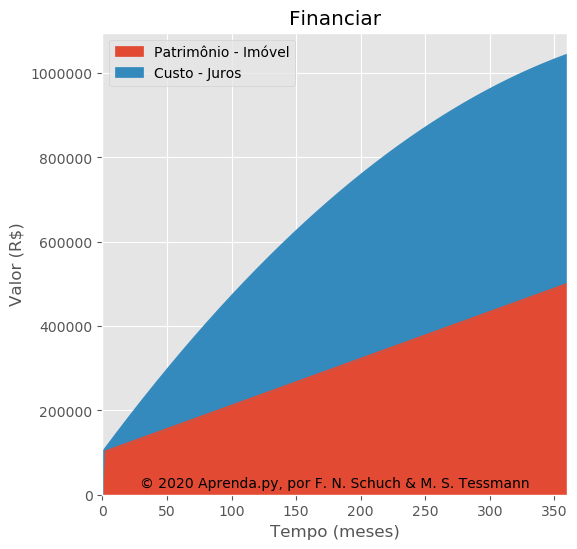

In [0]:
financiar[['Patrimônio - Imóvel',
           'Custo - Juros']
         ].plot.area(title='Financiar')
plt.xlabel('Tempo (meses)'); plt.ylabel('Valor (R$)')
copyright()

Veja o que dizem os números:

In [0]:
#hide
val_juros = round(financiar['Custo - Juros'][tempo],2)
val_imov = round(financiar['Patrimônio - Imóvel'][tempo],2)
val_total = val_juros + val_imov

In [0]:
#hide_input
print(f"Ao longo de {tempo} meses:")
print(f"  O montante total de R${val_total} foi desembolsado, sendo")
print(f"  R${val_juros} para a instituição financeira ({round(100*val_juros/val_total,2)}% do total)")
print(f"  e R${val_imov} foram aportados no imóvel ({round(100*val_imov/val_total,2)}% do total).")

Ao longo de 360 meses:
  O montante total de R$1043678.18 foi desembolsado, sendo
  R$543678.18 para a instituição financeira (52.09% do total)
  e R$500000.0 foram aportados no imóvel (47.91% do total).


### Alugar e Aportar Mensalmente

O segundo cenário avalia não comprar, mas sim alugar o imóvel pelo tempo estipulado. Entretanto, considera-se que todos os valores que seriam gastos com o financiamento no caso anterior serão convertidos em aportes em aplicações financeiras.

In [0]:
# Inicializamos um DataFrame vazio
alugar = pd.DataFrame(index=range(tempo+1))

# Calculamos o valor do aluguel
aluguel = round((valor_do_imovel)*taxa_aluguel,2)
alugar['Aluguel'] = aluguel
# Aluguel no tempo zero é igual a zero
alugar['Aluguel'][0] = 0.0

# Aqui calculamos o custo com aluguel como o somatório
# de todos os valores pagos
alugar['Custo - Aluguel'] = alugar['Aluguel'].cumsum()

# O aporte em aplicações financeiras se da pela diferença
# entre o que seria pago de financiamento no exemplo anterior
# e o valor do aluguel do imóvel
alugar['Aportes'] = financiar['Parcela'] - aluguel

# E o aporte inicial é o valor que estaria disponível como entrada
alugar['Aportes'][0] = entrada

Nesse exemplo faremos uma separação do `Patrimônio` em duas partes, a fração que é proveniente dos aportes como `Patrimônio - Principal`, enquanto a parte proveniente do rendimento dos juros será denominada `Patrimônio - Rendimentos`, que podem ser calculados como segue:

In [0]:
# Aqui a variável é basicamente inicializada
alugar['Patrimônio'] = alugar['Aportes']

# O patrimônio é realmente calculado neste laço
for n in alugar.index[1:]:
    alugar['Patrimônio'][n] = alugar['Aportes'][n] + alugar['Patrimônio'][n-1] * (1. + rendimento_investimentos)

# Por fim, a fração Principal é tida como o somatório de todos os aportes
alugar['Patrimônio - Principal'] = alugar['Aportes'].cumsum()
# E os rendimentos são obtidos pela seguinte subtração
alugar['Patrimônio - Rendimentos'] = alugar['Patrimônio'] - alugar['Patrimônio - Principal']

Feito todos os cálculos, podemos analisar os resultados

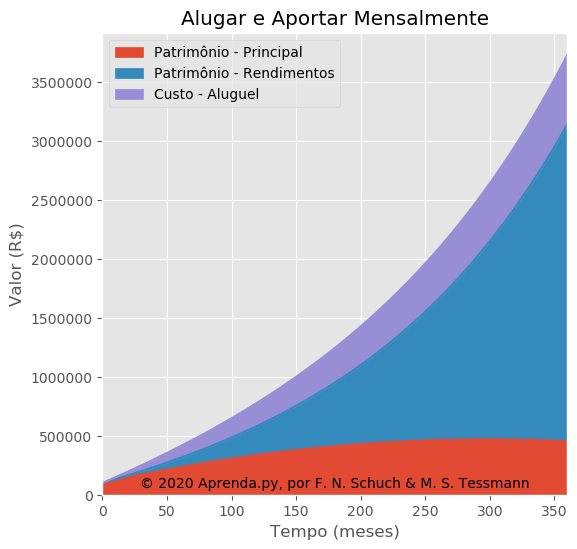

In [0]:
alugar[['Patrimônio - Principal',
        'Patrimônio - Rendimentos',
        'Custo - Aluguel']
      ].plot.area(title='Alugar e Aportar Mensalmente')

plt.xlabel('Tempo (meses)')
plt.ylabel('Valor (R$)')
copyright()

Veja o que dizem os números:

In [0]:
#hide
val_aluguel = round(alugar['Custo - Aluguel'][tempo],2)
val_principal = round(alugar['Patrimônio - Principal'][tempo],2)
val_rendimentos = round(alugar['Patrimônio - Rendimentos'][tempo],2)
val_total = round(val_principal + val_rendimentos,2)

In [0]:
#hide_input
print(f"Ao longo de {tempo} meses:")
print(f"  R${val_aluguel} foram desembolsados com aluguel.")
print(f"  O montante total em investimentos é de R${val_total}, sendo:")
print(f"    R${val_principal} proveniente dos aportes ({round(100*val_principal/val_total,2)}% do total)")
print(f"    e R${val_rendimentos} dos rendimentos ({round(100*val_rendimentos/val_total,2)}% do total).")

Ao longo de 360 meses:
  R$589273.2 foram desembolsados com aluguel.
  O montante total em investimentos é de R$3144815.24, sendo:
    R$454404.98 proveniente dos aportes (14.45% do total)
    e R$2690410.26 dos rendimentos (85.55% do total).


### Economizar e Comprar à Vista

O terceiro cenário considera a hipótese de alugar um imóvel e investir a diferença que haveria para um possível financiamento, assim como no caso anterior do aluguel. A diferença é que aqui o imóvel será comprado quando os investimentos atingirem o valor necessário. Nesse momento, o pagamento do aluguel será encerrado e os valores serão convertidos em mais aporte.

O patrimônio será composto agora de três partes, além da fração que é proveniente dos aportes como `Patrimônio - Principal` e da parte proveniente do rendimento dos juros, denominada `Patrimônio - Rendimentos`, teremos o `Patrimônio - Imóvel`.

Veja o cálculo:

In [0]:
# A parte inicial desse cenário é igual ao anterior,
# então iniciamos copiando os resultados
comprar = alugar.copy()

comprar['Patrimônio - Imóvel'] = 0.0

# A diferença é que o imóvel será comprado quando
# se atingir o saldo disponível, obtemos essa
# valor da planilha com o seguinte comando
tcompra = comprar[comprar['Patrimônio']>=valor_do_imovel].first_valid_index()

# Escrevemos na tela para conferência
print(f'O imóvel será comprado no mês {tcompra}')

# Nesse instante compramos o imóvel
comprar['Patrimônio - Imóvel'][tcompra::] += valor_do_imovel

# E descontamos o valor da compra do
# montante que estava investido
comprar['Patrimônio'][tcompra::] -= valor_do_imovel
comprar['Patrimônio - Principal'][tcompra] -=  valor_do_imovel - comprar['Patrimônio - Rendimentos'][tcompra]
comprar['Patrimônio - Rendimentos'][tcompra] = 0.0

# Então redirecionamos todo o valor que seria gasto
# com aluguel a partir daqui para mais aportes
comprar['Aportes'][tcompra::] += comprar['Aluguel'][tcompra::]

# Zeramos a atualizamos o cálculo com custo de aluguel
comprar['Aluguel'][tcompra::] = 0.0
comprar['Custo - Aluguel'] = comprar['Aluguel'].cumsum()

# Por fim, calcula-se a evolução do patrimônio a
# partir da data da compra do imóvel
for n in alugar.index[tcompra+1:]:
    comprar['Patrimônio - Principal'][n] = comprar['Patrimônio - Principal'][n-1] + comprar['Aportes'][n]
    comprar['Patrimônio - Rendimentos'][n] = comprar['Patrimônio'][n-1] * rendimento_investimentos + comprar['Patrimônio - Rendimentos'][n-1]
    comprar['Patrimônio'][n] = comprar['Patrimônio - Principal'][n] + comprar['Patrimônio - Rendimentos'][n]

O imóvel será comprado no mês 103


E produzimos a figura do caso:

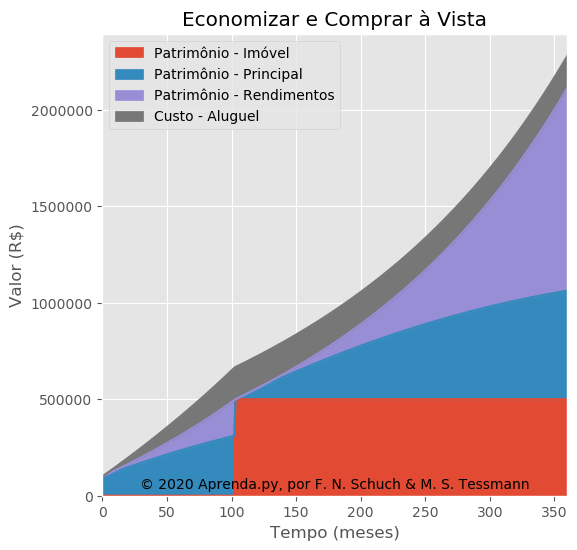

In [0]:
comprar[['Patrimônio - Imóvel',
         'Patrimônio - Principal',
         'Patrimônio - Rendimentos',
         'Custo - Aluguel']
       ].plot.area(title='Economizar e Comprar à Vista')
plt.xlabel('Tempo (meses)')
plt.ylabel('Valor (R$)')
copyright()

Veja o que dizem os números:

In [0]:
#hide
val_aluguel = round(comprar['Custo - Aluguel'][tempo],2)
val_principal = round(comprar['Patrimônio - Principal'][tempo],2)
val_rendimentos = round(comprar['Patrimônio - Rendimentos'][tempo],2)
val_total = round(val_principal + val_rendimentos + valor_do_imovel,2)

In [0]:
#hide_input
print(f"Ao longo de {tempo} meses:")
print(f"  R${val_aluguel} foram desembolsados com {tcompra} meses de aluguel,")
print(f"  O montante total em investimentos foi de R${val_total}, sendo:")
print(f"    R${val_principal} proveniente dos aportes ({round(100*val_principal/val_total,2)}% do total)")
print(f"    e R${val_rendimentos} dos rendimentos ({round(100*val_rendimentos/val_total,2)}% do total),")
print(f"    além de R${valor_do_imovel} do imóvel ({round(100*valor_do_imovel/val_total,2)}% do total),")

Ao longo de 360 meses:
  R$166960.74 foram desembolsados com 103 meses de aluguel,
  O montante total em investimentos foi de R$2113852.73, sendo:
    R$562981.64 proveniente dos aportes (26.63% do total)
    e R$1050871.09 dos rendimentos (49.71% do total),
    além de R$500000.0 do imóvel (23.65% do total),


## Síntese dos Resultados

Para sintetizar tudo o que vimos até aqui, criaremos uma tabela auxiliar apenas com os dados observados ao final do período de estudos, e isso é feito facilmente em um DataFrame com o comando `.tail(1)`:

In [0]:
# Criamos um DataFrame vazio
summary = pd.DataFrame()

# Adicionamos os valores obtidos na tempo final de cada um dos cenários
summary = summary.append(alugar.tail(1), ignore_index=True, sort=False)
summary = summary.append(comprar.tail(1), ignore_index=True, sort=False)
summary = summary.append(financiar.tail(1), ignore_index=True, sort=False)

# Vamos eliminar as colunas da tabela que não nos interessam
summary.drop(['Aluguel', 'Aportes', 'Patrimônio', 'Juros',
              'Amortização', 'Parcela', 'Saldo Devedor'], axis=1, inplace=True)

# E renomear as linhas de acordo com cada caso
summary.index = ['Alugar', 'Comprar à Vista', 'Financiar']

# Por fim mostramos na tela
summary.fillna(0)

,Custo - Aluguel,Patrimônio - Principal,Patrimônio - Rendimentos,Patrimônio - Imóvel,Custo - Juros
Alugar,589273.20,454404.980000,2.690410e+06,0.0,0.00
Comprar à Vista,166960.74,562981.636969,1.050871e+06,500000.0,0.00
Financiar,0.00,0.000000,0.000000e+00,500000.0,543678.18


Por fim, apresentamos a figura:

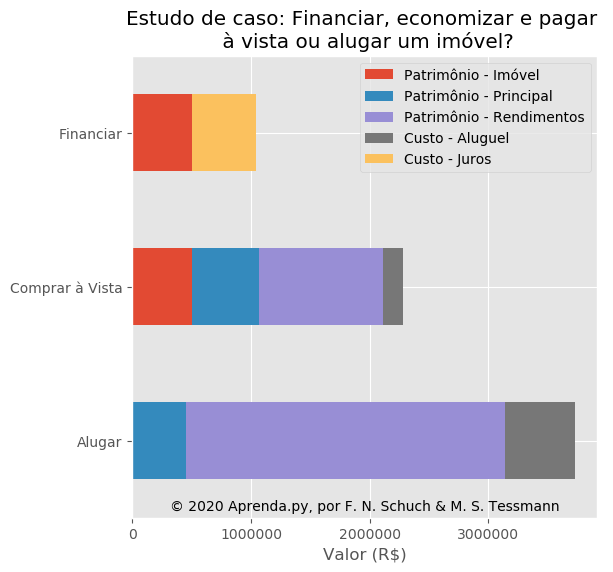

In [0]:
summary[['Patrimônio - Imóvel',
         'Patrimônio - Principal',
         'Patrimônio - Rendimentos',
         'Custo - Aluguel',
         'Custo - Juros']
       ].plot.barh(stacked=True)

plt.title('Estudo de caso: Financiar, economizar e pagar \n à vista ou alugar um imóvel?')
plt.xlabel('Valor (R$)')
plt.locator_params(axis='x', nbins=5)
copyright()

# Conclusão

Nesse estudo de caso buscamos identificar as possíveis diferenças nos resultados de financiar quatro quintos de um imóvel, alugar um imóvel para morar e investir o montante que seria desembolsado com a compra, e pagar aluguel enquanto poupa o dinheiro para comprá-lo à vista. Para quaisquer exercícios deste tipo, o valor da taxa de juros é sempre o principal determinante.
Vamos considerar os juros como os valores pagos pela posse do dinheiro, onde você os paga quando é um agente deficitário – tem menos dinheiro do que necessita e precisa tomar emprestado  – e os recebe quando é um agente superavitário – tem mais dinheiro do que precisa e investe o que sobra -, e que tem sua taxa definida pelas escolhas intertemporais dos indivíduos, as quais acabam por determinar sua oferta e demanda de equilíbrio.
Para fins de simplificação e comparação dos três cenários em questão, mantivemos constantes as receitas e despesas das famílias, assim como a taxa de juros do financiamento em 9,42% a.a., do aluguel em 4% a.a. e dos rendimentos financeiros em 8% a.a.
Os resultados mostram que ao final do período considerado, caso você não atribua valor – tenha prazer - ao fato de se considerar o dono do imóvel, os benefícios pecuniários serão muito maiores se for pago aluguel e investido os valores que seriam gastos com a compra do imóvel. Se por algum motivo essa não for uma alternativa, é mais vantajoso poupar o dinheiro enquanto paga o aluguel para efetuar a compra do imóvel à vista, ao final dos primeiros 29% do período.<br>

-----



> **Felipe Nornberg Schuch**,<br>
> Dr. Eng. Mecânico pela PUCRS. Possui experiência em mecânica dos fluidos computacional, fenômenos de transporte, programação, métodos numéricos, educação financeira e outros.<br>
> [felipeschuch@outlook.com](mailto:felipeschuch@outlook.com) [@fschuch](https://twitter.com/fschuch)<br>

<br>

> **Mathias Schneid Tessmann**,<br>
> Doutorando em Economia com ênfase em Finanças pela Universidade Católica de Brasília. Assessor acadêmico, pesquisador e professor no IDP.<br>
> [@mathiazst](https://twitter.com/mathiazst)


-----